In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
from numpy import loadtxt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [3]:
import matplotlib.pyplot as plt

#xgb.plot_tree(xg_reg,num_trees=0)
#plt.rcParams['figure.figsize'] = [50, 10]
#plt.show()

In [4]:
df = pd.read_csv('pres.csv')
df = df.dropna()
df

,dataset,shd_sparsebn,time_sparsebn,shd_bidag,time_bidag,shd_brave,time_brave
0,alarm,99,1345.317600,90,3.370051,39,1.195130
1,andes,692,2150.521800,669,171.480000,273,68.260170
2,barley,163,5242.298400,133,5.230051,106,1.943666
3,child,46,263.534816,46,2.285925,41,0.563999
4,diabetes,1311,0.000000,1081,871.261200,974,430.412490
5,hailfinder,130,1328.227200,130,350.453820,85,1.569062
6,hepar2,261,1905.402000,206,16.585530,120,2.591146
7,mildew,92,5332.536000,76,128.156040,54,0.591510
8,pigs*,1300,8630.359200,1171,1000.000000,979,465.420420
9,win95pts,216,993.667800,224,13.750460,144,3.549545


<Figure size 432x288 with 0 Axes>

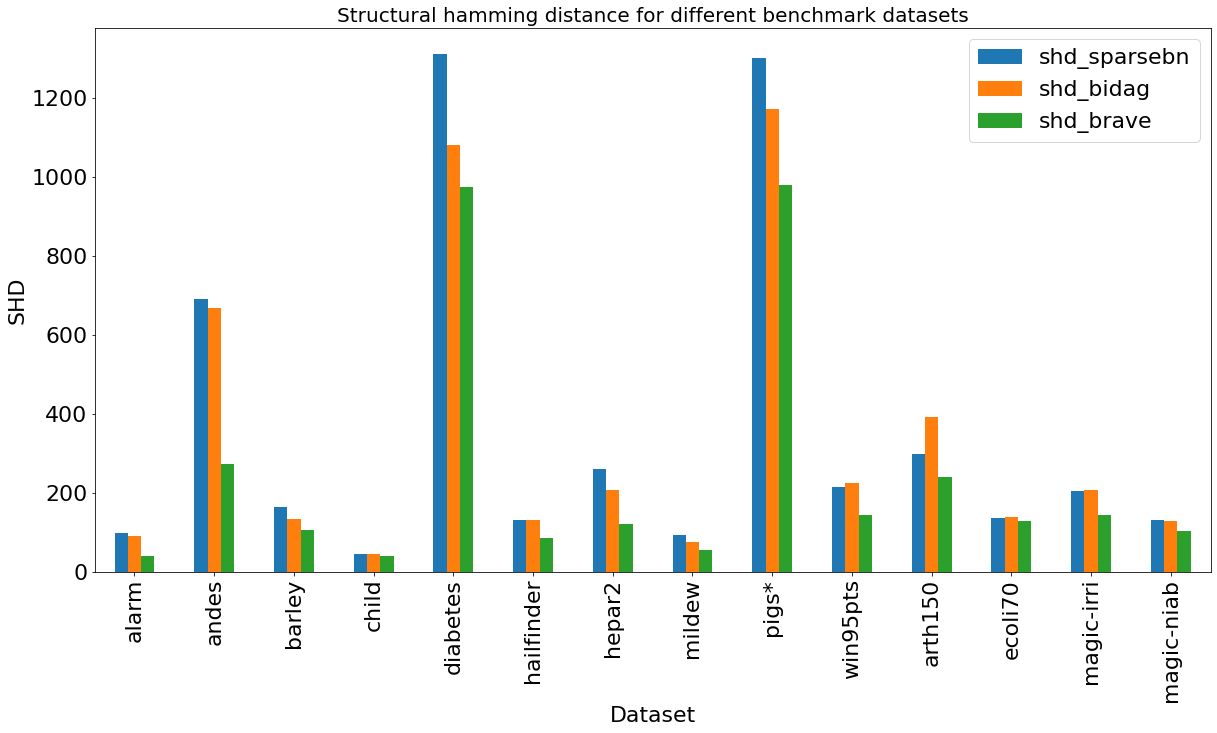

In [5]:
plt.figure()
plt.rcParams.update({'font.size': 22})
df.plot(x="dataset", y=["shd_sparsebn", "shd_bidag", "shd_brave"], kind="bar",figsize=(20,10))
plt.xlabel('Dataset', fontdict={'fontsize': 22})
plt.ylabel('SHD', fontdict={'fontsize': 22})
plt.title('Structural hamming distance for different benchmark datasets', fontdict={'fontsize': 20})
plt.show()

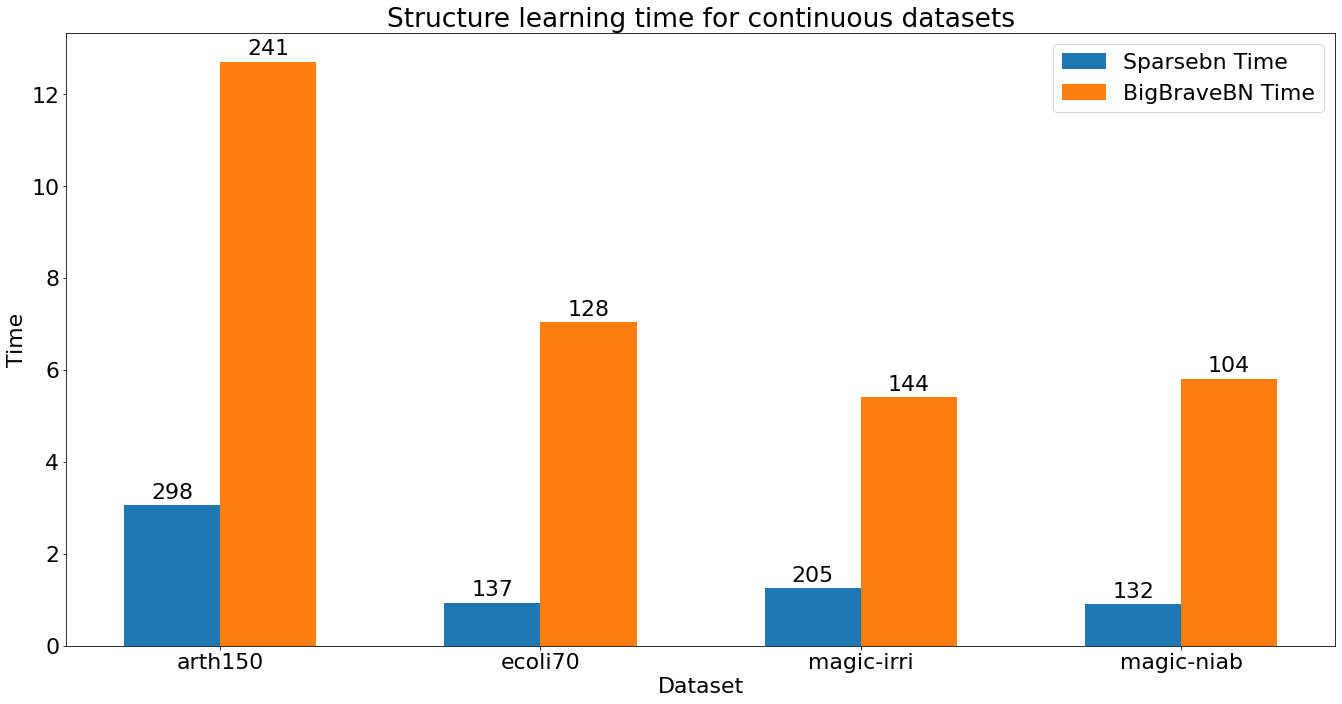

In [50]:
labels = df.iloc[10:]['dataset']
sparsebn = df.iloc[10:]['time_sparsebn']
brave = df.iloc[10:]['time_brave']

x = np.arange(len(labels))  # the label locations
width = 0.3  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, round(sparsebn, 2), width, label='Sparsebn Time')
rects2 = ax.bar(x + width/2, round(brave, 2), width, label='BigBraveBN Time')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Time')
ax.set_xlabel('Dataset')
ax.set_title('Structure learning time for continuous datasets')
ax.set_xticks(x, labels)
ax.legend()

ax.bar_label(rects1, df.iloc[10:]['shd_sparsebn'],padding=3)
ax.bar_label(rects2, df.iloc[10:]['shd_brave'],padding=3)

fig.tight_layout()
fig.set_size_inches(25, 15)
plt.show()

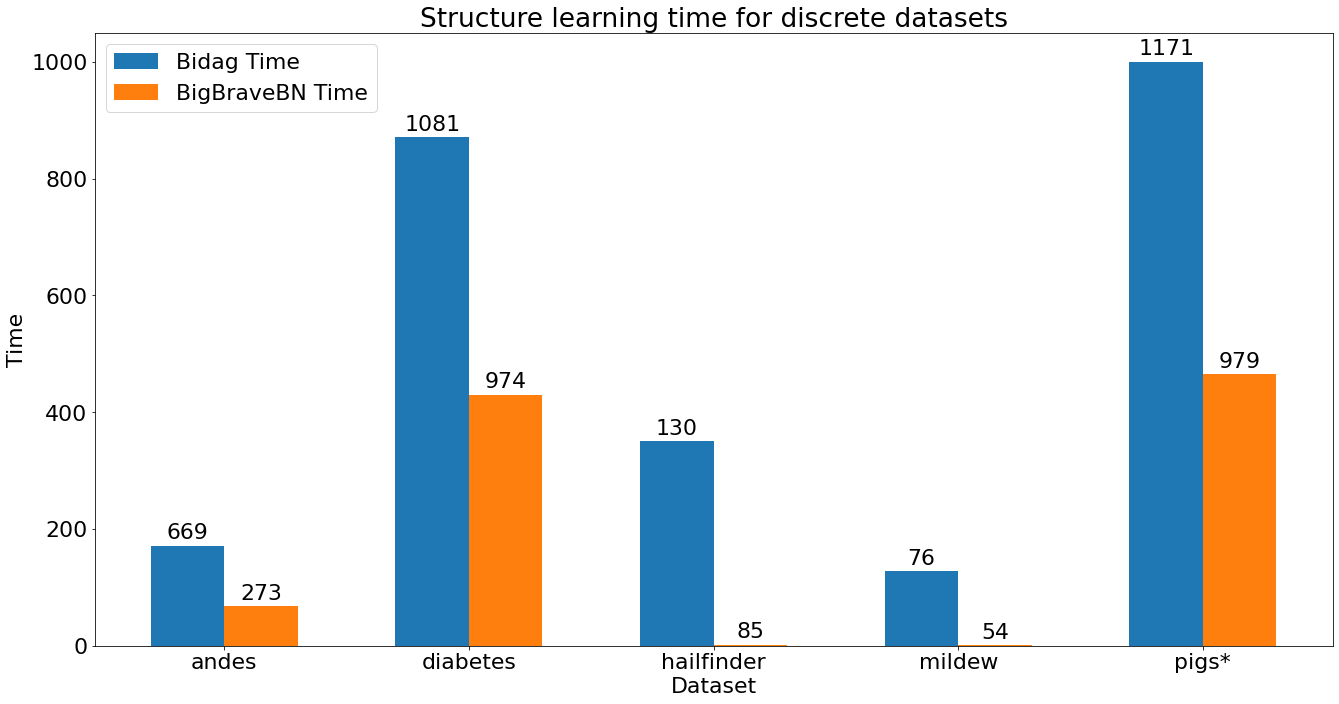

In [49]:
labels = df.iloc[[1, 4, 5, 7, 8]]['dataset']
bidag = df.iloc[[1, 4, 5, 7, 8]]['time_bidag']
brave = df.iloc[[1, 4, 5, 7, 8]]['time_brave']

x = np.arange(len(labels))  # the label locations
width = 0.3  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, round(bidag), width, label='Bidag Time')
rects2 = ax.bar(x + width/2, round(brave), width, label='BigBraveBN Time')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Time')
ax.set_xlabel('Dataset')
ax.set_title('Structure learning time for discrete datasets')
ax.set_xticks(x, labels)
ax.legend()

ax.bar_label(rects1, df.iloc[[1, 4, 5, 7, 8]]['shd_bidag'],padding=3)
ax.bar_label(rects2, df.iloc[[1, 4, 5, 7, 8]]['shd_brave'],padding=3)

fig.tight_layout()
fig.set_size_inches(25, 15)
plt.show()

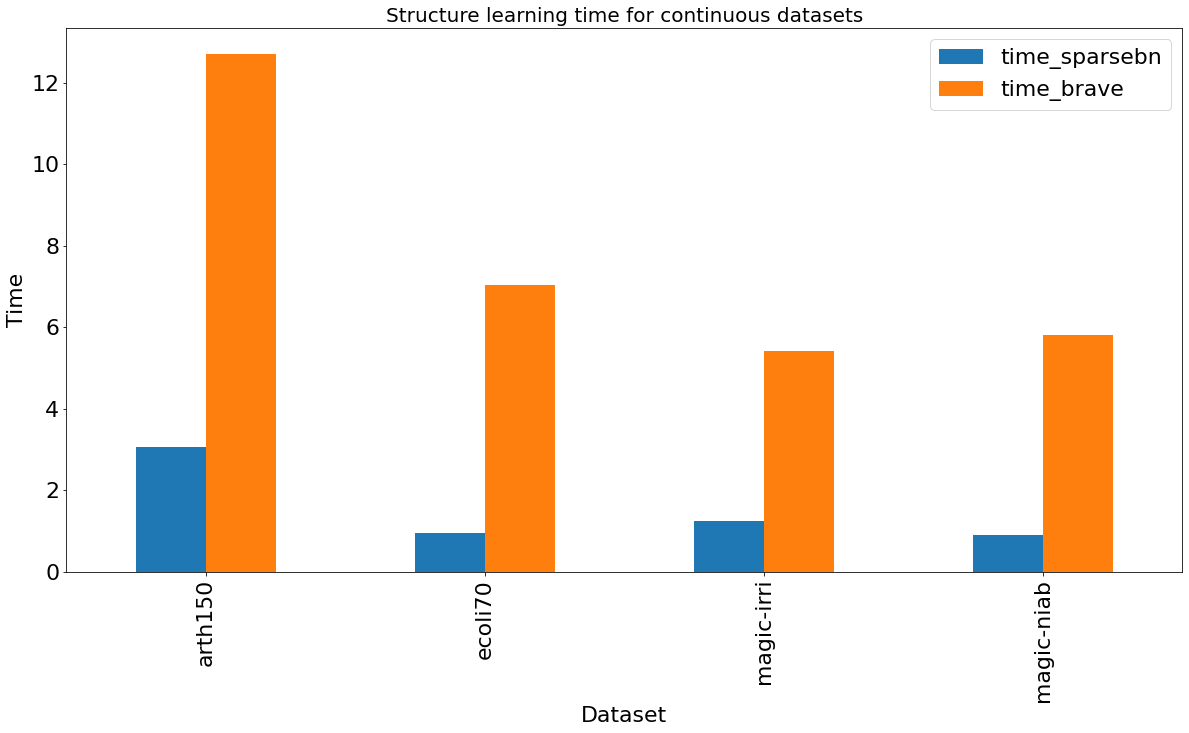

In [46]:
from matplotlib.pyplot import bar_label


df.iloc[10:].plot(x="dataset", y=["time_sparsebn", "time_brave"], kind="bar", figsize=(20,10))
plt.xlabel('Dataset', fontdict={'fontsize': 22})
plt.ylabel('Time', fontdict={'fontsize': 22})
plt.title('Structure learning time for continuous datasets', fontdict={'fontsize': 20})
plt.show()

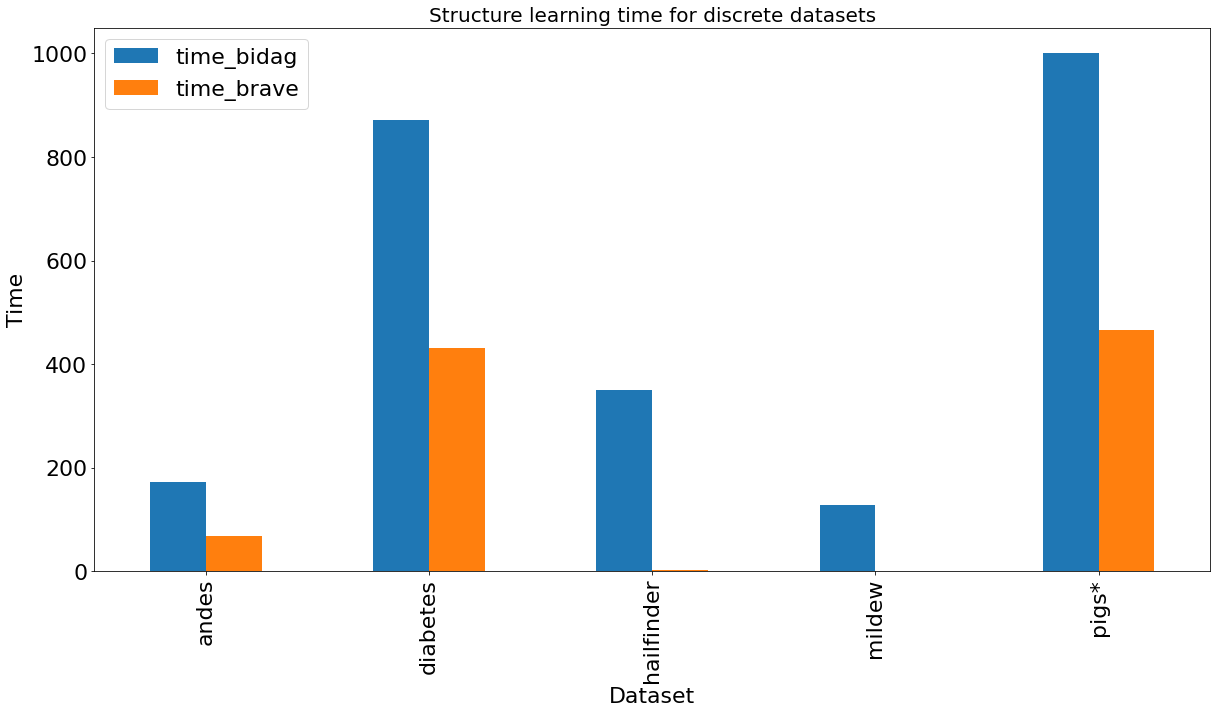

In [7]:

df.iloc[[1, 4, 5, 7, 8]].plot(x="dataset", y=["time_bidag", "time_brave"], kind="bar",figsize=(20,10))
plt.xlabel('Dataset', fontdict={'fontsize': 22})
plt.ylabel('Time', fontdict={'fontsize': 22})
plt.title('Structure learning time for discrete datasets', fontdict={'fontsize': 20})
plt.show()

In [34]:
df_bnrand = pd.read_csv("BigBraveBNvRandom.csv")
df_bnrand


,dataset,bigbravebn_shd,randomset_shd
0,pigs,979,1370
1,diabetes,974,1167
2,andes,273,651
3,barley,106,143
4,hepar2,120,195
5,win95pts,144,205


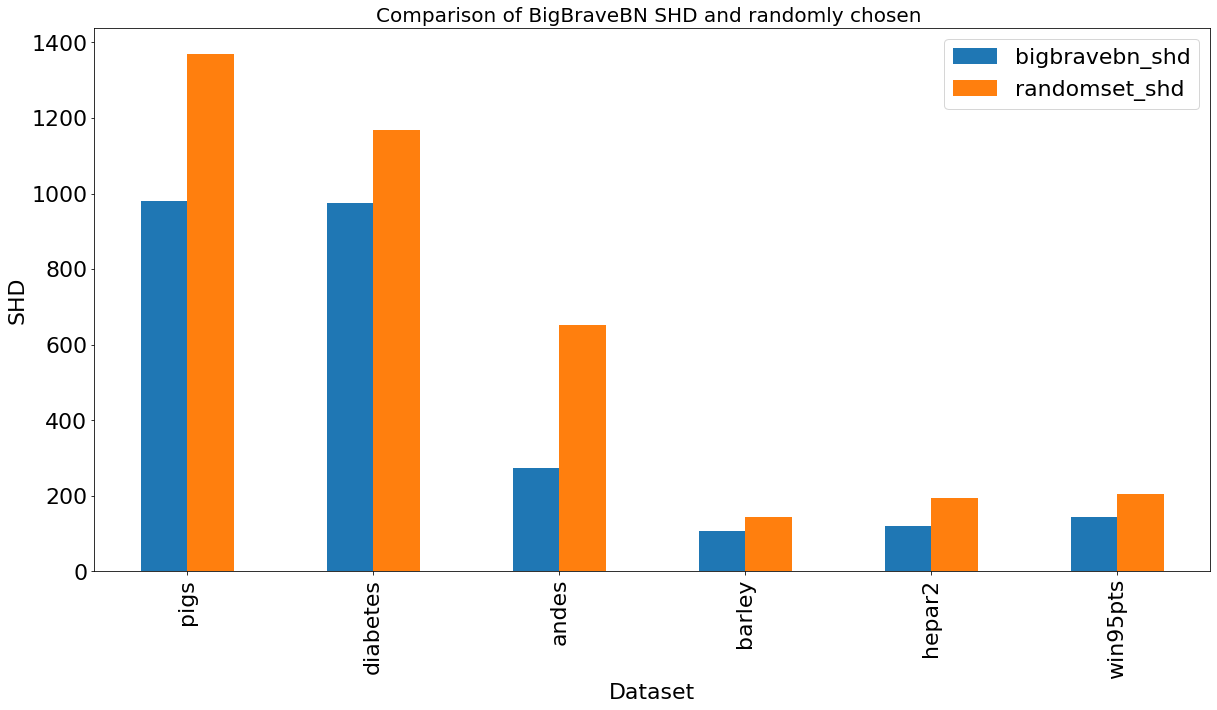

In [11]:
df_bnrand.plot(x="dataset", y=["bigbravebn_shd", "randomset_shd"], kind="bar", figsize=(20,10))
plt.xlabel('Dataset', fontdict={'fontsize': 22})
plt.ylabel('SHD', fontdict={'fontsize': 22})
plt.title('Comparison of BigBraveBN SHD and randomly chosen ', fontdict={'fontsize': 20})
plt.show()
